In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("asm_full_opt")

from pixel_map import PixelMap
from asm_prop import ASMPropagator
import config

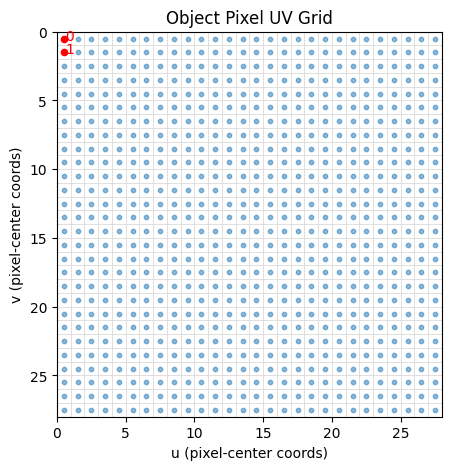

uv_hw shape: (784, 2)
First 5 entries of uv_hw flattened view:
[[0.5 0.5]
 [0.5 1.5]
 [0.5 2.5]
 [0.5 3.5]
 [0.5 4.5]]


In [2]:
pm = PixelMap(config)

uv = pm.pixel_uv_grid(flatten=True).cpu().numpy()  # [H*W, 2]
p0 = uv[0]
p1 = uv[1]

H = pm.H_obj
W = pm.W_obj

plt.figure(figsize=(5, 5))
# draw grid
for k in range(W+1):
    plt.plot([k, k], [0, H], linewidth=0.5, color="lightgray")
for k in range(H+1):
    plt.plot([0, W], [k, k], linewidth=0.5, color="lightgray")

plt.scatter(uv[:, 0], uv[:, 1], s=10, alpha=0.5, label="All pixel centers")

# Highlight first two points
plt.scatter(p0[0], p0[1], c="red", s=20, marker="o", label="uv[0]")
plt.scatter(p1[0], p1[1], c="red", s=20, marker="o", label="uv[1]")

# Annotate them
plt.text(p0[0] + 0.1, p0[1] + 0.1, "0", color="red", fontsize=10)
plt.text(p1[0] + 0.1, p1[1] + 0.1, "1", color="red", fontsize=10)

plt.xlim(0, W)
plt.ylim(H, 0)
plt.gca().set_aspect("equal")
plt.xlabel("u (pixel-center coords)")
plt.ylabel("v (pixel-center coords)")
plt.title("Object Pixel UV Grid")
plt.show()

print("uv_hw shape:", uv.shape)
print("First 5 entries of uv_hw flattened view:")
print(uv[:5])

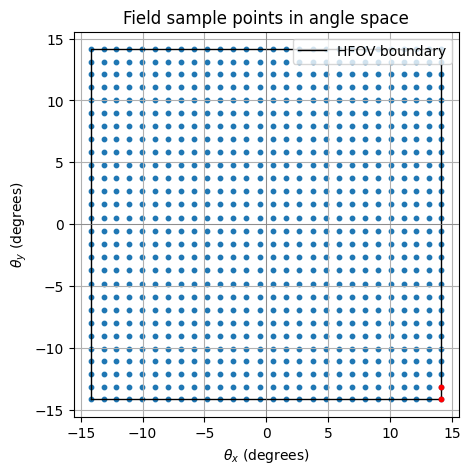

In [3]:
theta_x, theta_y = pm.uv_to_angles(uv)

# Convert to degrees for visualization
tx = theta_x.detach().cpu().numpy() * 180 / math.pi
ty = theta_y.detach().cpu().numpy() * 180 / math.pi

plt.figure(figsize=(5,5))

hfov = pm.hfov  # degrees
a = hfov / np.sqrt(2)  # half-width in degrees
plt.plot([-a,  a,  a, -a, -a],
         [-a, -a,  a,  a, -a],
         linewidth=1, color="black", label="HFOV boundary")
    

plt.scatter(tx, ty, s=10)

# Highlight the first sample (p=0) in red
plt.scatter(tx[0:2], ty[0:2], s=10, color="red", zorder=3)

plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)

plt.xlabel(r"$\theta_x$ (degrees)")
plt.ylabel(r"$\theta_y$ (degrees)")
plt.title("Field sample points in angle space")
plt.legend()

plt.gca().set_aspect("equal")
plt.grid(True)


In [4]:
sx, sy = pm.angles_to_sensor_xy(theta_x, theta_y)



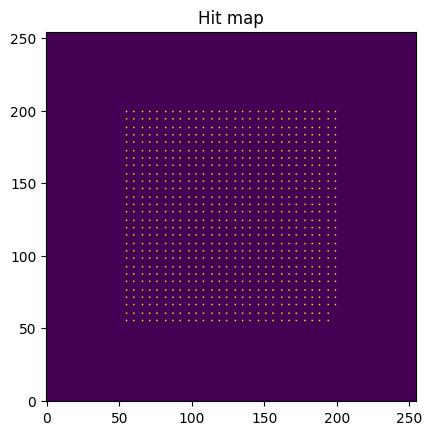

In [5]:
hit = pm.field_points_to_hit_map(sx, sy)
plt.imshow(hit.detach().cpu().T, origin="lower"); plt.title("Hit map"); plt.show()


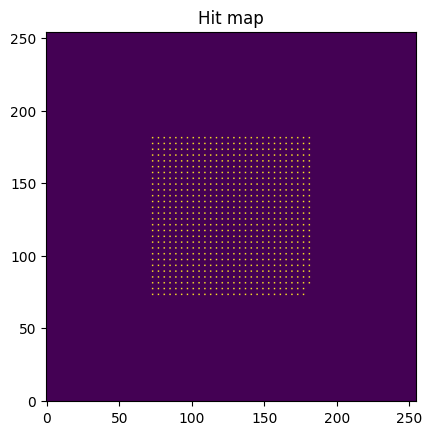

In [6]:
sx1, sy1 = pm.map_obj_to_sensor_xy(hfov_deg=15)

hit1 = pm.field_points_to_hit_map(sx1, sy1)
plt.imshow(hit1.detach().cpu().T, origin="lower"); plt.title("Hit map"); plt.show()
